# **Import Package**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

#Data Understanding

The goal of this dataset is to predict whether a customer will be interested in buying travel insurance or not

| column | information |
|--|--|
|Age| Age Of The Customer|
Employment Type| The Sector In Which Customer Is Employed|
GraduateOrNot| Whether The Customer Is College Graduate Or Not
AnnualIncome| The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]
FamilyMembers| Number Of Members In Customer's Family
ChronicDisease| Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
FrequentFlyer| Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].
EverTravelledAbroad| Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]
TravelInsurance| Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

In [ ]:
df = pd.read_csv('TravelInsurancePrediction.csv')

In [ ]:
df.head(5)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


Delete unneccesarry column

In [ ]:
df_new = df.drop(['Unnamed: 0'],axis=1)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [ ]:
df_new.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
df_new.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


#**Data Cleaning**

##Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(df_new, test_size=0.3, random_state=42)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 1390
No. of testing examples: 597


In [ ]:
training_data.head(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1953,34,Government Sector,Yes,1300000,7,0,No,No,1
1642,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
943,29,Private Sector/Self Employed,Yes,1200000,5,1,No,No,0
286,28,Private Sector/Self Employed,Yes,600000,3,0,No,No,0
1593,26,Private Sector/Self Employed,Yes,500000,8,0,No,No,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955 entries, 1953 to 860
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  955 non-null    int64
 1   EmploymentType       955 non-null    int64
 2   GraduateOrNot        955 non-null    int64
 3   AnnualIncome         955 non-null    int64
 4   FamilyMembers        955 non-null    int64
 5   ChronicDiseases      955 non-null    int64
 6   FrequentFlyer        955 non-null    int64
 7   EverTravelledAbroad  955 non-null    int64
 8   TravelInsurance      955 non-null    int64
dtypes: int64(9)
memory usage: 74.6 KB


##Check duplicated 

df train

In [ ]:
print(f'Data dimension before duplicate handling:{training_data.shape[0]}')
df_train = training_data.drop_duplicates()
print(f'Data dimension after duplicate handling:{df_train.shape[0]}')

Data dimension before duplicate handling:1390
Data dimension after duplicate handling:955


df test

In [ ]:
print(f'Data dimension before duplicate handling:{testing_data.shape[0]}')
df_test = testing_data.drop_duplicates()
print(f'Data dimension after duplicate handling:{df_test.shape[0]}')

Data dimension before duplicate handling:597
Data dimension after duplicate handling:500


##Missing Value Check

df train

In [ ]:
df_train.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

df test

In [ ]:
df_test.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

there are no missing values in both of dataset train and test

##Check Outliers

df train

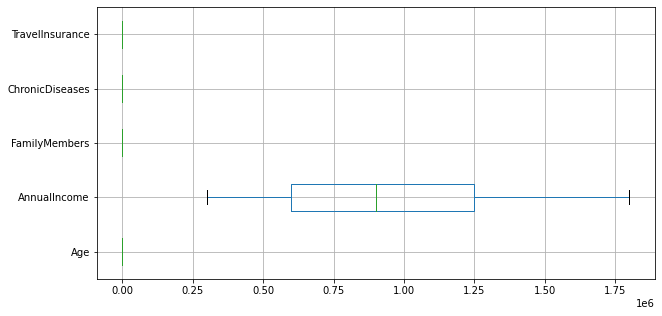

In [ ]:
plt.figure(figsize=(10,5))

df_train.boxplot(vert=False)
plt.show()

df test

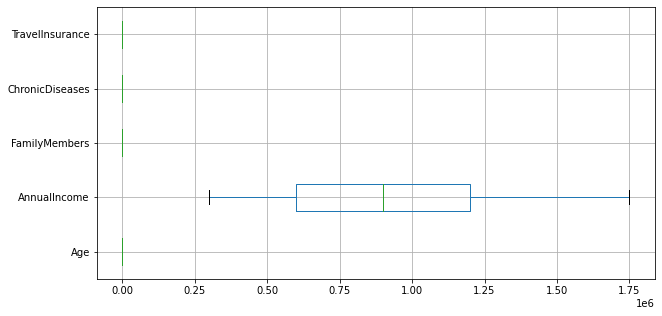

In [ ]:
plt.figure(figsize=(10,5))

df_test.boxplot(vert=False)
plt.show()

there are no outlier in both of dataset train and test

##Feature Encoding

Check the value each columns

In [ ]:
for column_value in df_train.columns:
  print(f'========={column_value}=========')
  display(df_train[column_value].value_counts().sort_values(ascending=True))
  print()

=========Age=========


35     32
30     36
32     53
27     65
25     72
26     73
33     78
29     97
31    107
34    117
28    225
Name: Age, dtype: int64


=========Employment Type=========


Government Sector               270
Private Sector/Self Employed    685
Name: Employment Type, dtype: int64


=========GraduateOrNot=========


No     158
Yes    797
Name: GraduateOrNot, dtype: int64


=========AnnualIncome=========


1550000     3
1800000     4
450000      8
1750000    11
950000     13
1450000    13
1700000    14
1350000    19
650000     22
350000     24
400000     24
300000     25
1000000    29
1500000    31
850000     31
1250000    36
750000     37
900000     38
1150000    38
1050000    39
550000     41
700000     44
1200000    50
1300000    53
600000     56
1100000    56
1400000    60
500000     68
800000     68
Name: AnnualIncome, dtype: int64


=========FamilyMembers=========


8     37
9     39
2     61
7    105
6    137
3    176
5    191
4    209
Name: FamilyMembers, dtype: int64


=========ChronicDiseases=========


1    311
0    644
Name: ChronicDiseases, dtype: int64


=========FrequentFlyer=========


Yes    224
No     731
Name: FrequentFlyer, dtype: int64


=========EverTravelledAbroad=========


Yes    179
No     776
Name: EverTravelledAbroad, dtype: int64


=========TravelInsurance=========


1    358
0    597
Name: TravelInsurance, dtype: int64

Do a feature encoding based on above information for each categorical data type

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
label_encoder = LabelEncoder()

###Data train

In [ ]:
def encoding_kolom_train (kolom):
  df_train[kolom] = label_encoder.fit_transform(df_train[kolom])
  print(kolom)

In [ ]:
encoding_kolom_train('Employment Type')
encoding_kolom_train('GraduateOrNot')
encoding_kolom_train('FrequentFlyer')
encoding_kolom_train('EverTravelledAbroad')

Employment Type
GraduateOrNot
FrequentFlyer
EverTravelledAbroad


In [ ]:
df_train.rename(columns={'Employment Type': 'EmploymentType'},inplace=True)

In [ ]:
df_train.head(5)

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1953,34,0,1,1300000,7,0,0,0,1
1642,31,1,1,1250000,7,0,0,0,0
943,29,1,1,1200000,5,1,0,0,0
286,28,1,1,600000,3,0,0,0,0
1593,26,1,1,500000,8,0,0,0,0


###Data test

In [ ]:
def encoding_kolom (kolom):
  df_test[kolom] = label_encoder.fit_transform(df_test[kolom])
  print(kolom)

In [ ]:
encoding_kolom('Employment Type')
encoding_kolom('GraduateOrNot')
encoding_kolom('FrequentFlyer')
encoding_kolom('EverTravelledAbroad')

Employment Type
GraduateOrNot
FrequentFlyer
EverTravelledAbroad


In [ ]:
df_test.rename(columns={'Employment Type': 'EmploymentType'},inplace=True)

In [ ]:
df_test.head(5)

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
212,28,1,1,750000,5,1,0,0,0
1517,26,1,1,1400000,4,1,0,1,1
785,29,1,1,1200000,7,0,0,1,0
1175,33,0,1,400000,4,1,0,0,0
1760,34,1,1,1500000,3,0,1,1,1


In [ ]:
print(df_train['TravelInsurance'].value_counts())
print(df_test['TravelInsurance'].value_counts())

0    597
1    358
Name: TravelInsurance, dtype: int64
0    309
1    191
Name: TravelInsurance, dtype: int64


#**Exploratory Data Analysis**

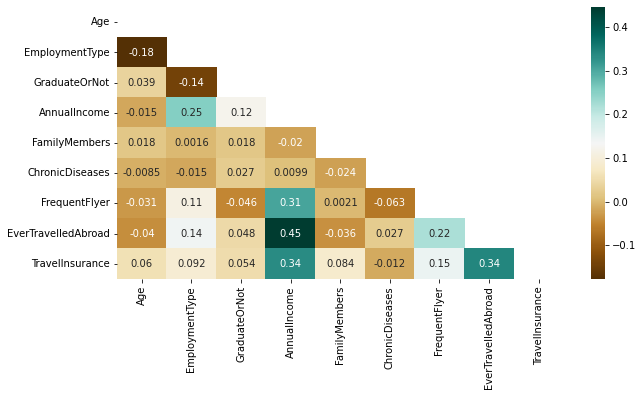

In [ ]:
plt.figure(figsize=(10,5))
mask = np.triu(np.ones_like(df_train.corr(),dtype=np.bool))
sns.heatmap(df_train.corr(),mask=mask,annot=True,cmap='BrBG')
plt.show()

There are 2 columns that have quite correlation with data target (TravelInsurance)

Employment Type

In [ ]:
df_employment = df_train['EmploymentType'].value_counts().reset_index()
df_employment.columns= ['Employment','Count']
df_employment

,Employment,Count
0,1,685
1,0,270


1. Government Sector = 0 
2. Private Sector/Self Employed = 1

---



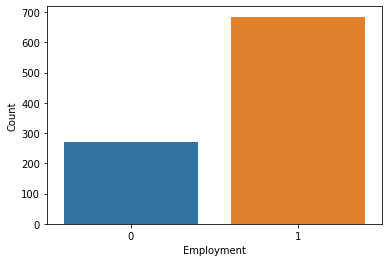

In [ ]:
sns.barplot(data=df_employment,x='Employment',y='Count')

Income

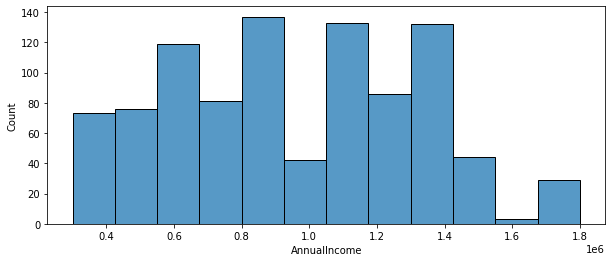

In [ ]:
# Know the distribution of Income 
plt.figure(figsize=(10,4))
sns.histplot(df_train, x='AnnualIncome')

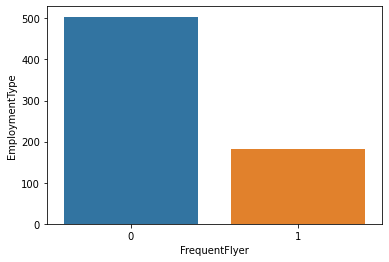

In [ ]:
freq_flyer = df_train[df_train['EmploymentType']==1].reset_index()
freq_flyer = freq_flyer.groupby('FrequentFlyer').agg({'EmploymentType':'count'}).reset_index()
sns.barplot(data=freq_flyer,x='FrequentFlyer',y='EmploymentType')

private employees tend not to participate in loyalty programs such as frequent flyers

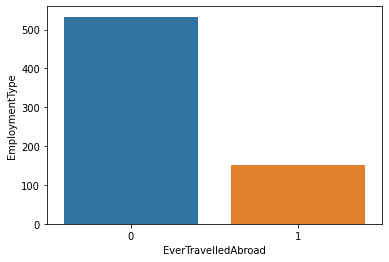

In [ ]:
EverTravelledAbroad = df_train[df_train['EmploymentType']==1].reset_index()
EverTravelledAbroad = EverTravelledAbroad.groupby('EverTravelledAbroad').agg({'EmploymentType':'count'}).reset_index()
sns.barplot(data=EverTravelledAbroad,x='EverTravelledAbroad',y='EmploymentType')

most of the private employees have never travelled abroad

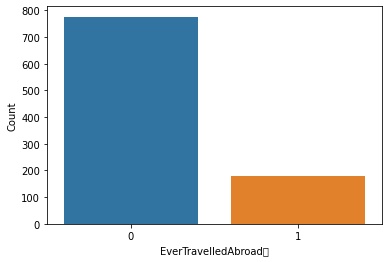

In [ ]:
travelaboard = df_train['EverTravelledAbroad'].value_counts().reset_index()
travelaboard.columns= ['EverTravelledAbroad	','Count']
sns.barplot(data=travelaboard,x='EverTravelledAbroad	',y='Count')

Distribution of TravelInsurance column

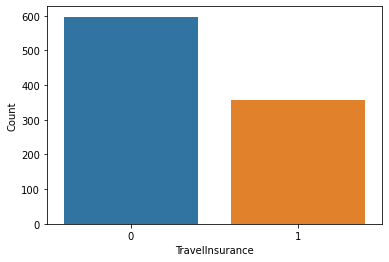

In [ ]:
travelinsurance = df_train['TravelInsurance'].value_counts().reset_index()
travelinsurance.columns= ['TravelInsurance','Count']
sns.barplot(data=travelinsurance,x='TravelInsurance',y='Count')

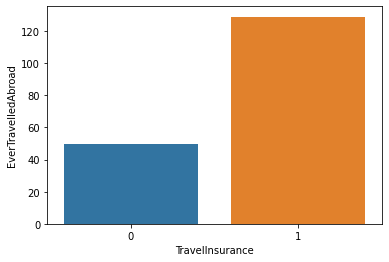

In [ ]:
TravelIns1 = df_train[df_train['EverTravelledAbroad']==1].reset_index()
TravelIns1 = TravelIns1.groupby('TravelInsurance').agg({'EverTravelledAbroad':'count'}).reset_index()
sns.barplot(data=TravelIns1,x='TravelInsurance',y='EverTravelledAbroad')

Most of people that ever travelled aboard tend to buy for travel insurance packages

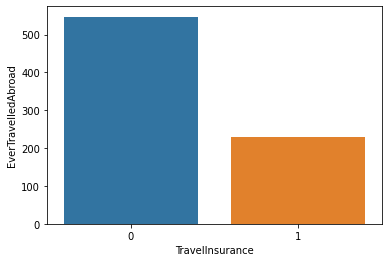

In [ ]:
TravelIns2 = df_train[df_train['EverTravelledAbroad']==0].reset_index()
TravelIns2 = TravelIns2.groupby('TravelInsurance').agg({'EverTravelledAbroad':'count'}).reset_index()
sns.barplot(data=TravelIns2,x='TravelInsurance',y='EverTravelledAbroad')

Most of people that never travelled aboard,only a few buy travel insurance packages

# Modelling

##Split data into X and y

Data Train

In [ ]:
X_train = df_train.drop(['TravelInsurance'],axis=1)
y_train = df_train['TravelInsurance'].values

Data Test

In [ ]:
X_test = df_test.drop(['TravelInsurance'],axis=1)
y_test = df_test['TravelInsurance'].values

Code to show model result

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# suatu fungsi untuk menampilkan summary/report dari model ML kita
def summary_report(y_true, y_pred, X_test, clf): # clf = clasifier
    # Get Prediction Result
    print(classification_report(y_true,y_pred))
        
    # Show Confusion Matrix Data
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print(f'True Positives: {tp}')
    print(f'False Positives: {fp}')
    print(f'True Negatives: {tn}')
    print(f'False Negatives: {fn}')
  

## CatBoost Model

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 32 kB/s 


####Model

In [ ]:
import catboost as ctb
model_cb= ctb.CatBoostClassifier()
model_cb.fit(X_train,y_train)

Learning rate set to 0.010102
0:	learn: 0.6893326	total: 4.9ms	remaining: 4.89s
1:	learn: 0.6872628	total: 5.57ms	remaining: 2.78s
2:	learn: 0.6837633	total: 6.61ms	remaining: 2.2s
3:	learn: 0.6805152	total: 7.27ms	remaining: 1.81s
4:	learn: 0.6767334	total: 8.32ms	remaining: 1.66s
5:	learn: 0.6732704	total: 10.3ms	remaining: 1.7s
6:	learn: 0.6693846	total: 11.5ms	remaining: 1.63s
7:	learn: 0.6667755	total: 12.3ms	remaining: 1.53s
8:	learn: 0.6631104	total: 13.2ms	remaining: 1.45s
9:	learn: 0.6605583	total: 14.2ms	remaining: 1.4s
10:	learn: 0.6579188	total: 15.3ms	remaining: 1.38s
11:	learn: 0.6545200	total: 16.4ms	remaining: 1.35s
12:	learn: 0.6515849	total: 17.7ms	remaining: 1.34s
13:	learn: 0.6480860	total: 18.9ms	remaining: 1.33s
14:	learn: 0.6449702	total: 19.9ms	remaining: 1.31s
15:	learn: 0.6424874	total: 20.8ms	remaining: 1.28s
16:	learn: 0.6401342	total: 21.7ms	remaining: 1.26s
17:	learn: 0.6371992	total: 22.6ms	remaining: 1.23s
18:	learn: 0.6359495	total: 23.5ms	remaining: 1.

####Test

In [ ]:
predicted_cb = model_cb.predict(X_test)
summary_report(y_test,predicted_cb,X_test,model_cb)

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       309
           1       0.89      0.53      0.67       191

    accuracy                           0.80       500
   macro avg       0.83      0.75      0.76       500
weighted avg       0.82      0.80      0.78       500

True Positives: 102
False Positives: 12
True Negatives: 297
False Negatives: 89


##Naive bayes

####Train

In [ ]:
from sklearn.naive_bayes import CategoricalNB
model_nb = CategoricalNB()

model_nb.fit(X_train,y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

####Test

In [ ]:
predicted_nb = model_nb.predict(X_test)
summary_report(y_test,predicted_nb,X_test,model_nb)

              precision    recall  f1-score   support

           0       0.72      0.95      0.82       309
           1       0.83      0.40      0.54       191

    accuracy                           0.74       500
   macro avg       0.77      0.67      0.68       500
weighted avg       0.76      0.74      0.71       500

True Positives: 76
False Positives: 16
True Negatives: 293
False Negatives: 115


##Random Forest

####Train

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=10)
model_RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

####Test

In [ ]:
predicted_rf = model_RF.predict(X_test)
summary_report(y_test,predicted_rf,X_test,model_RF)

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       309
           1       0.70      0.57      0.63       191

    accuracy                           0.74       500
   macro avg       0.73      0.71      0.72       500
weighted avg       0.74      0.74      0.74       500

True Positives: 109
False Positives: 47
True Negatives: 262
False Negatives: 82


#Handling model for data imbalance to get better classification Score

##Resampling data for data imbalance (Over-sampling)

In [ ]:
yes = df_train[df_train.TravelInsurance==1]
no = df_train[df_train.TravelInsurance==0]

In [ ]:
from sklearn.utils import resample

In [ ]:
yes_upsampled = resample(yes,replace = True,n_samples=len(no),random_state=42)

In [ ]:
upsampled = pd.concat([no, yes_upsampled])

In [ ]:
upsampled['TravelInsurance'].value_counts()

1    597
0    597
Name: TravelInsurance, dtype: int64

##Split data into X and y after resampling

Data Train

In [ ]:
X_train1 = upsampled.drop(['TravelInsurance'],axis=1)
y_train1 = upsampled['TravelInsurance'].values

Data Test

In [ ]:
X_test = df_test.drop(['TravelInsurance'],axis=1)
y_test = df_test['TravelInsurance'].values

##Catboost

Also use threshold

In [ ]:
model_cb= ctb.CatBoostClassifier()
model_cb.fit(X_train1,y_train1)

Learning rate set to 0.011113
0:	learn: 0.6885215	total: 3.25ms	remaining: 3.25s
1:	learn: 0.6847892	total: 4.64ms	remaining: 2.32s
2:	learn: 0.6805505	total: 5.72ms	remaining: 1.9s
3:	learn: 0.6772058	total: 6.84ms	remaining: 1.7s
4:	learn: 0.6733113	total: 7.89ms	remaining: 1.57s
5:	learn: 0.6700916	total: 9.01ms	remaining: 1.49s
6:	learn: 0.6671712	total: 10.2ms	remaining: 1.44s
7:	learn: 0.6637862	total: 11.3ms	remaining: 1.4s
8:	learn: 0.6602754	total: 12.6ms	remaining: 1.39s
9:	learn: 0.6573822	total: 14.1ms	remaining: 1.39s
10:	learn: 0.6533481	total: 15.4ms	remaining: 1.38s
11:	learn: 0.6499593	total: 16.5ms	remaining: 1.36s
12:	learn: 0.6479136	total: 17.6ms	remaining: 1.33s
13:	learn: 0.6446129	total: 18.5ms	remaining: 1.3s
14:	learn: 0.6414341	total: 19.6ms	remaining: 1.29s
15:	learn: 0.6386683	total: 20.7ms	remaining: 1.27s
16:	learn: 0.6356577	total: 21.9ms	remaining: 1.26s
17:	learn: 0.6334948	total: 23.1ms	remaining: 1.26s
18:	learn: 0.6305657	total: 24.1ms	remaining: 1.

###Train

In [ ]:
threshold = 0.39

train_proba_cb = model_cb.predict_proba(X_train)
train_proba_cb = (train_proba_cb [:,1] >= threshold).astype('int')
summary_report(y_train,train_proba_cb,X_train,model_cb)

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       597
           1       0.75      0.81      0.78       358

    accuracy                           0.83       955
   macro avg       0.81      0.82      0.82       955
weighted avg       0.83      0.83      0.83       955

True Positives: 291
False Positives: 99
True Negatives: 498
False Negatives: 67


In [ ]:
print('F1 score:', f1_score(y_train, train_proba_cb, average='weighted'))
print('Accuracy score:', accuracy_score(y_train, train_proba_cb))

F1 score: 0.8275027097940557
Accuracy score: 0.8261780104712042


###Test

In [ ]:
threshold = 0.39

predicted_proba_cb = model_cb.predict_proba(X_test)
predicted_proba_cb = (predicted_proba_cb [:,1] >= threshold).astype('int')
summary_report(y_test,predicted_proba_cb,X_test,model_cb)

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       309
           1       0.63      0.64      0.64       191

    accuracy                           0.72       500
   macro avg       0.71      0.71      0.71       500
weighted avg       0.72      0.72      0.72       500

True Positives: 123
False Positives: 71
True Negatives: 238
False Negatives: 68


In [ ]:
print('F1 score:', f1_score(y_test, predicted_proba_cb, average='weighted'))
print('Accuracy score:', accuracy_score(y_test, predicted_proba_cb))

F1 score: 0.7224050681026292
Accuracy score: 0.722


##Naive bayes

In [ ]:
model_nb = CategoricalNB()

model_nb.fit(X_train1,y_train1)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

###Train

In [ ]:
threshold = 0.35

train_proba_nb = model_nb.predict_proba(X_train)
train_proba_nb = (train_proba_nb [:,1] >= threshold).astype('int')
summary_report(y_train,train_proba_nb,X_train,model_nb)

              precision    recall  f1-score   support

           0       0.76      0.68      0.71       597
           1       0.54      0.64      0.59       358

    accuracy                           0.66       955
   macro avg       0.65      0.66      0.65       955
weighted avg       0.68      0.66      0.67       955

True Positives: 230
False Positives: 194
True Negatives: 403
False Negatives: 128


In [ ]:
print('F1 score:', f1_score(y_train, train_proba_nb, average='weighted'))
print('Accuracy score:', accuracy_score(y_train, train_proba_nb))

F1 score: 0.6671916466263458
Accuracy score: 0.6628272251308901


###Test

In [ ]:
threshold = 0.35

predicted_proba_nb = model_nb.predict_proba(X_test)
predicted_proba_nb = (predicted_proba_nb [:,1] >= threshold).astype('int')
summary_report(y_test,predicted_proba_nb,X_test,model_nb)

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       309
           1       0.56      0.66      0.61       191

    accuracy                           0.67       500
   macro avg       0.66      0.67      0.66       500
weighted avg       0.69      0.67      0.68       500

True Positives: 126
False Positives: 98
True Negatives: 211
False Negatives: 65


In [ ]:
print('F1 score:', f1_score(y_test, predicted_proba_nb, average='weighted'))
print('Accuracy score:', accuracy_score(y_test, predicted_proba_nb))

F1 score: 0.6777665739882607
Accuracy score: 0.674


##Random Forest

In [ ]:
model_RF = RandomForestClassifier(n_estimators=10)
model_RF.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

###Train

In [ ]:
threshold = 0.39

train_proba_rf = model_RF.predict_proba(X_train)
train_proba_rf = (train_proba_rf [:,1] >= threshold).astype('int')
summary_report(y_train,train_proba_rf,X_train,model_RF)

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       597
           1       0.81      0.89      0.85       358

    accuracy                           0.88       955
   macro avg       0.87      0.88      0.87       955
weighted avg       0.88      0.88      0.88       955

True Positives: 320
False Positives: 77
True Negatives: 520
False Negatives: 38


In [ ]:
print(f'F1 score:',f1_score(y_train,train_proba_rf,average='weighted'))
print(f'Accuracy score: {accuracy_score(y_train,train_proba_rf)}')

F1 score: 0.8806582620250663
Accuracy score: 0.8795811518324608


###Test

In [ ]:
threshold = 0.39

predicted_proba_rf = model_RF.predict_proba(X_test)
predicted_proba_rf = (predicted_proba_rf [:,1] >= threshold).astype('int')
summary_report(y_test,predicted_proba_rf,X_test,model_RF)

              precision    recall  f1-score   support

           0       0.77      0.76      0.77       309
           1       0.62      0.64      0.63       191

    accuracy                           0.71       500
   macro avg       0.70      0.70      0.70       500
weighted avg       0.72      0.71      0.71       500

True Positives: 122
False Positives: 74
True Negatives: 235
False Negatives: 69


In [ ]:
print(f'F1 score:',f1_score(y_test, predicted_proba_rf,average='weighted'))
print(f'Accuracy score: {accuracy_score(y_test, predicted_proba_rf)}')

F1 score: 0.7146811504398666
Accuracy score: 0.714


##Model result Comparison

In [ ]:
print('========CatBoost========')
print('F1 score:', f1_score(y_test, predicted_proba_cb, average='weighted'))
print('Accuracy score:', accuracy_score(y_test, predicted_proba_cb))
print(' ')
print('========Naive Bayes========')
print('F1 score:', f1_score(y_test, predicted_proba_nb, average='weighted'))
print('Accuracy score:', accuracy_score(y_test, predicted_proba_nb))
print(' ')
print('========Random Forest========')
print(f'F1 score:',f1_score(y_test, predicted_proba_rf,average='weighted'))
print(f'Accuracy score: {accuracy_score(y_test, predicted_proba_rf)}')

========CatBoost========
F1 score: 0.7224050681026292
Accuracy score: 0.722
 
========Naive Bayes========
F1 score: 0.6777665739882607
Accuracy score: 0.674
 
========Random Forest========
F1 score: 0.7146811504398666
Accuracy score: 0.714


After the imbalance problem was solved by resampling and set threshold, it was found that the machine learning catboost model gave better results than the other 2 models.